Empleando los datos del archivo './src/crypto_currency'.

- Cargue los datos en una base de datos apropiada.
- Lea mediante pandas las bases cargadas
- Emplee un metodo de concatenación para unificar la información.(debe considerar que se añadirá una columna adicional que especifique el tipo de moneda)
- Genere un agrupamiento de información a manera de obtener un resumen de los datos.
- Almacene dichos datos en un reporte excel.
- Apoyandose del ejercicio 2. Cree una imagen que sea guarda en el archivo excel
- Emplee un método de envio de correos



In [1]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import xlsxwriter

In [2]:
# 1. Cargar datos en una base de datos SQLite
DB_CRYPTO = 'crypto_data.db'
TABLE_CRYPTO = 'crypto_table'

def cargar_datos_a_db(df: pd.DataFrame, db_name: str, table_name: str) -> None:
    with sqlite3.connect(db_name) as conn:
        df.to_sql(table_name, conn, if_exists='replace', index=False)

In [4]:
# Leer datos desde el archivo xlsx
df_crypto = pd.read_excel('./src/cripto_currency.xlsx')
cargar_datos_a_db(df_crypto, DB_CRYPTO, TABLE_CRYPTO)

In [8]:
# 2. Leer los datos usando pandas
with sqlite3.connect(DB_CRYPTO) as conn:
    df_crypto = pd.read_sql_query(f'SELECT * FROM {TABLE_CRYPTO}', conn)
df_crypto

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-19 00:00:00,19335.027344,19348.416016,19127.687500,19139.535156,19139.535156,22425387184
1,2022-10-20 00:00:00,19138.085938,19315.199219,18971.458984,19053.740234,19053.740234,24493974420
2,2022-10-21 00:00:00,19053.203125,19237.384766,18770.970703,19172.468750,19172.468750,32459287866
3,2022-10-22 00:00:00,19172.380859,19248.068359,19132.244141,19208.189453,19208.189453,16104440957
4,2022-10-23 00:00:00,19207.734375,19646.652344,19124.197266,19567.007813,19567.007813,22128794335
...,...,...,...,...,...,...,...
361,2023-10-15 00:00:00,26858.011719,27289.169922,26817.894531,27159.652344,27159.652344,7098201980
362,2023-10-16 00:00:00,27162.628906,29448.138672,27130.472656,28519.466797,28519.466797,27833876539
363,2023-10-17 00:00:00,28522.097656,28618.751953,28110.185547,28415.748047,28415.748047,14872527508
364,2023-10-18 00:00:00,28413.531250,28889.009766,28174.251953,28328.341797,28328.341797,12724128586


In [7]:
# 3. Unificar información con una columna adicional para el tipo de moneda
df_crypto['CurrencyType'] = 'crypto'
df_crypto

,Date,Open,High,Low,Close,Adj Close,Volume,CurrencyType
0,2022-10-19 00:00:00,19335.027344,19348.416016,19127.687500,19139.535156,19139.535156,22425387184,crypto
1,2022-10-20 00:00:00,19138.085938,19315.199219,18971.458984,19053.740234,19053.740234,24493974420,crypto
2,2022-10-21 00:00:00,19053.203125,19237.384766,18770.970703,19172.468750,19172.468750,32459287866,crypto
3,2022-10-22 00:00:00,19172.380859,19248.068359,19132.244141,19208.189453,19208.189453,16104440957,crypto
4,2022-10-23 00:00:00,19207.734375,19646.652344,19124.197266,19567.007813,19567.007813,22128794335,crypto
...,...,...,...,...,...,...,...,...
361,2023-10-15 00:00:00,26858.011719,27289.169922,26817.894531,27159.652344,27159.652344,7098201980,crypto
362,2023-10-16 00:00:00,27162.628906,29448.138672,27130.472656,28519.466797,28519.466797,27833876539,crypto
363,2023-10-17 00:00:00,28522.097656,28618.751953,28110.185547,28415.748047,28415.748047,14872527508,crypto
364,2023-10-18 00:00:00,28413.531250,28889.009766,28174.251953,28328.341797,28328.341797,12724128586,crypto


In [10]:
# 4. Generar un resumen de los datos
resumen = df_crypto.describe()
resumen

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,24652.877546,25028.054938,24311.236659,24677.854065,24677.854065,2.010118e+10
std,4584.694775,4649.226060,4530.711369,4581.679053,4581.679053,1.276175e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,5.331173e+09
25%,21004.456543,21380.321289,20626.584961,21101.902344,21101.902344,1.220265e+10
50%,26274.266602,26655.055664,25901.611328,26312.971680,26312.971680,1.643088e+10
75%,28166.975098,28597.271484,27681.176758,28177.442383,28177.442383,2.464002e+10
max,31474.720703,31814.515625,30659.355469,31476.048828,31476.048828,1.189925e+11


In [11]:
# 5. Almacenar datos en un reporte Excel
with pd.ExcelWriter('./reportes/crypto_report.xlsx', engine='xlsxwriter') as writer:
    df_crypto.to_excel(writer, sheet_name='CryptoData', index=False)
    resumen.to_excel(writer, sheet_name='Summary')

0

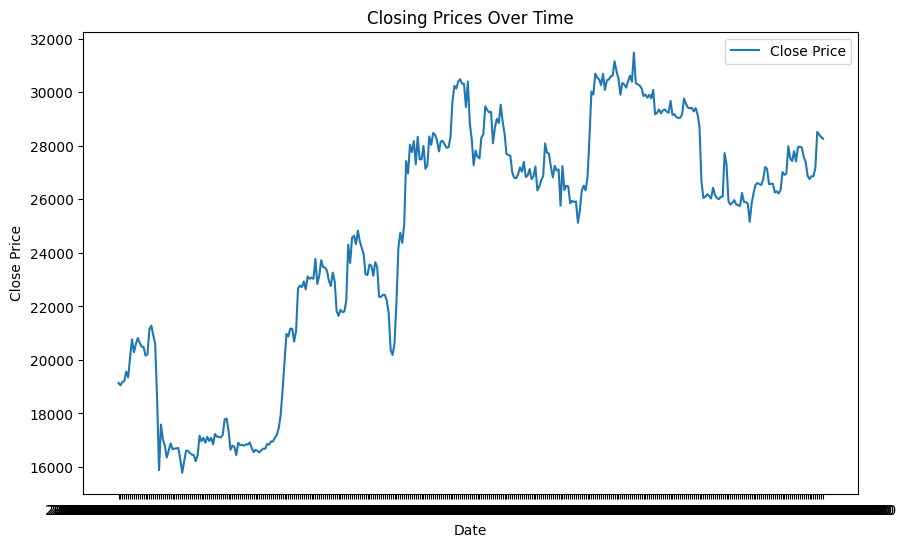

In [12]:
    # 6. Crear imagen y guardarla en el archivo Excel
    plt.figure(figsize=(10, 6))
    plt.plot(df_crypto['Date'], df_crypto['Close'], label='Close Price')
    plt.title('Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.savefig('./reportes/crypto_chart.png', dpi=300)
    
    worksheet = writer.sheets['CryptoData']
    worksheet.insert_image('H2', './reportes/crypto_chart.png')

In [13]:
# 7. Envío de correo electrónico 
def func_sender_email(sender_email, sender_password, receiver_email, subject, message, archivo_adjunto):
   
    print(f"Email sent to {receiver_email} with subject: {subject} and attachment: {archivo_adjunto}")